# K-means Algorithm

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

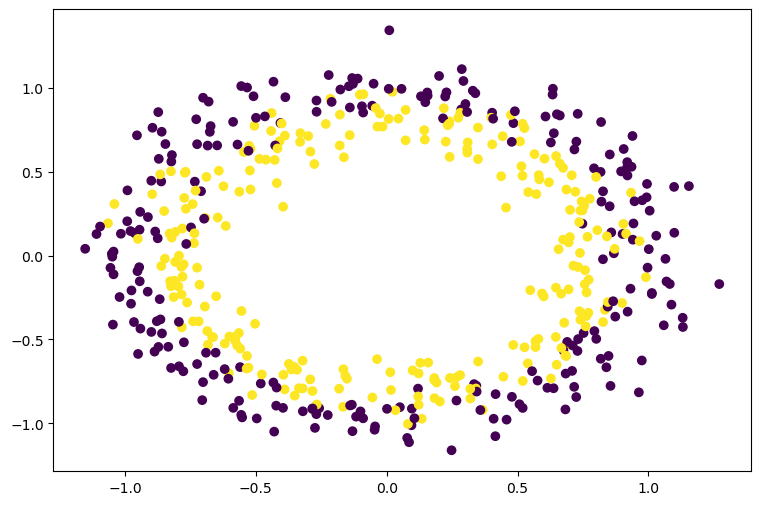

In [2]:
x, y = make_circles(n_samples=500, noise=0.1)
# 전체 데이터 샘플의 개수 = 500 -> x는 실제 좌표 데이터, y는 라벨 데이터
# 0,1 정도의 노이즈를 줘서 데이터를 흩어지게 함
plt.figure(figsize=(9, 6))

plt.scatter(x[:, 0], x[:, 1], c=y)
# 첫 번째 열은 2차원 좌표 중 x 좌표, 두 번째 열은 2차원 좌표 중 y 데이터
# c=y: y 값에 따라 point color를 다르게 설정(c:color)

plt.show()

In [3]:
print(f"x: {x[:10]}") # [x y]
print(f"y: {y[:10]}")

x: [[-0.77471477 -0.51690606]
 [ 0.27341609  0.82096797]
 [-0.73964933 -0.39174478]
 [-0.81089664 -0.15029504]
 [-0.56025999 -0.66442585]
 [-0.66313201 -0.48591132]
 [-0.43248529  1.03564975]
 [-0.68023509  0.91686514]
 [ 0.61967702  0.43655759]
 [-0.52026568  0.63629597]]
y: [0 1 1 1 0 1 0 0 1 1]


In [4]:
x = torch.FloatTensor(x)

In [5]:
def l2distance(a, b): # 중심과 각 점들의 거리를 측정하는 거리 함수
    return torch.argmin(torch.sum((a-b)**2, dim=1), dim=0) # 각 점과 중심과의 거리를 계산하여 가장 거리가 가까운 점(최소값)의 인덱스를 반환

# squared differences_i,j = (a_i - b_i)^2
# L2 Distance(Sum the squared differences) = ∑(a_i,n - b_j,n)^2
# argmin() 함수는 배열이나 텐서에서 최소값의 인덱스를 찾는 함수

In [14]:
def kmeans(x, num_clusters = 2, max_iteration = 5):
    #device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    device = torch.device("cpu") 
    x = x.to(device)
    centroids = torch.rand(num_clusters, x.size(1)).to(device)
    for update in range(max_iteration):
        y_assign = []
        for m in range(x.size(0)):
            h = x[m].expand(num_clusters, -1)
            assign = l2distance(h, centroids)
            y_assign.append(assign.item())

        y_assign = np.array(y_assign)
        if update != max_iteration - 1:
            for i in range(num_clusters):
                idx = np.where(y_assign == i)[0]
                centroids[i] = torch.mean(x[idx], dim = 0)
    return y_assign, centroids

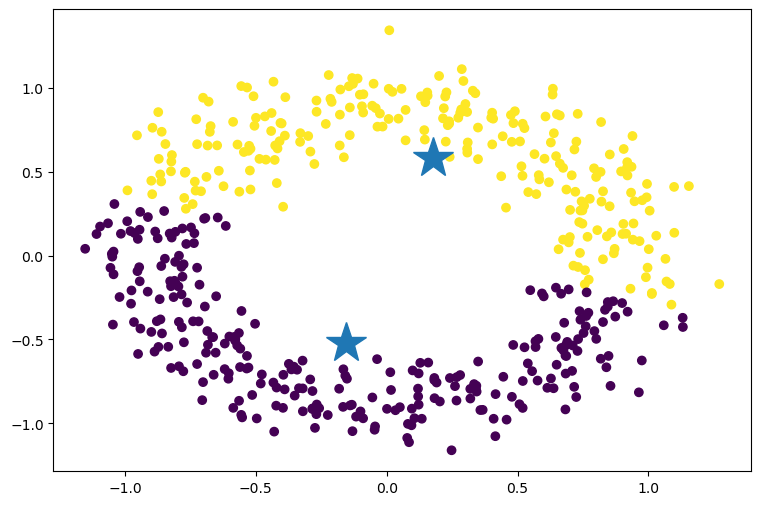

In [15]:
y_pred, centroids = kmeans(x, 2)

plt.figure(figsize = (9, 6))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)
plt.plot(centroids[:, 0], centroids[:, 1], '*', markersize = 30)
plt.show()

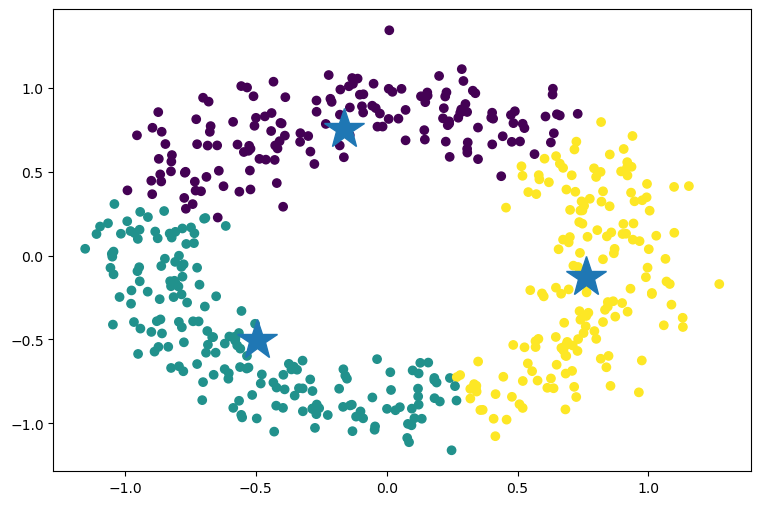

In [16]:
y_pred, centroids = kmeans(x, 3)

plt.figure(figsize = (9, 6))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)
plt.plot(centroids[:, 0], centroids[:, 1], '*', markersize = 30)
plt.show()

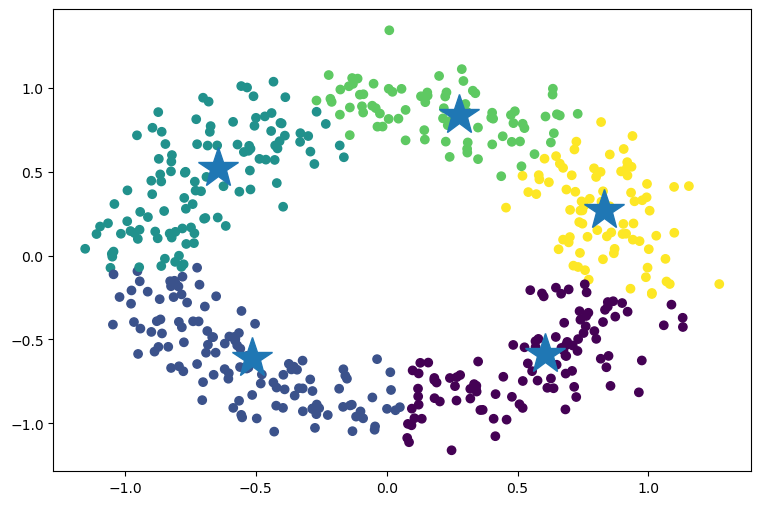

In [17]:
y_pred, centroids = kmeans(x, 5)

plt.figure(figsize = (9, 6))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)
plt.plot(centroids[:, 0], centroids[:, 1], '*', markersize = 30)
plt.show()

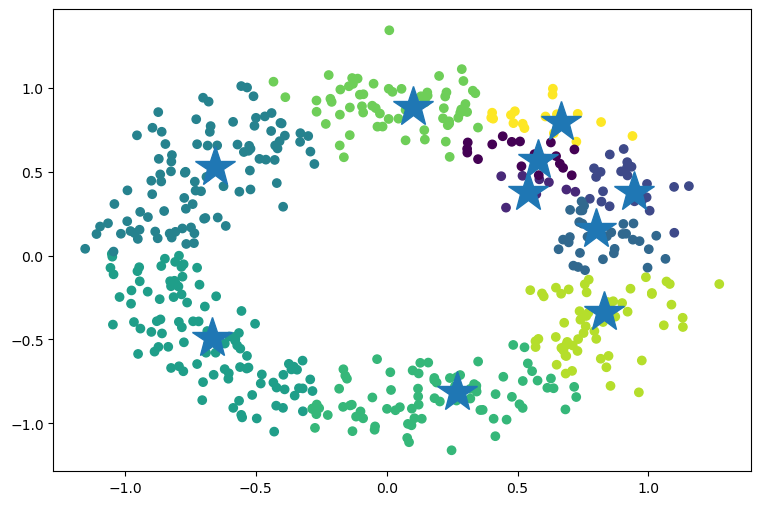

In [18]:
y_pred, centroids = kmeans(x, 10)

plt.figure(figsize = (9, 6))
plt.scatter(x[:, 0], x[:, 1], c = y_pred)
plt.plot(centroids[:, 0], centroids[:, 1], '*', markersize = 30)
plt.show()